In [1]:
# mounting drive over the colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Otherwise we can use the existing dataset i've aaded in my folder ... access it and unzip it as per requirement
# Downloading the dataset
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:08<00:00, 279MB/s]
100% 1.06G/1.06G [00:09<00:00, 127MB/s]


In [3]:
# Unzipping the dataset
! unzip dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [ ]:
# Dataset copied !... can be used whenever necessary
# import shutil
# shutil.copy('/content/dogs-vs-cats.zip','/content/drive/MyDrive/datasets')

'/content/drive/MyDrive/datasets/dogs-vs-cats.zip'

In [13]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# we can check images by using os
# but we have concept of generator by which we can create batches of images and do the processing as we needed
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', # The dataset will be created in the tf.data.Dataset
    labels = 'inferred', # subdirectories will be created according to the labels and the images
    label_mode = 'int', # label mode is in the integer format
    batch_size = 32, # batch of 32 images each
    image_size = (256,256) # fixed size of each image is going to be (256,256)
)

# Same with the validation set or the test set
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalization
def process(image,label):
  Image = tf.cast(image/255.0,tf.float32) # ensures that the value will get will be cast into directly float value
  return image,label

train_ds = train_ds.map(process) # Map specifically used to ensure application of image to every element in the dataset
validation_ds = validation_ds.map(process)

In [16]:
# Create CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding =  'valid' ))

model.add(Conv2D(64,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding =  'valid' ))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides = 2,padding =  'valid' ))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))


In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [18]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [19]:
history = model.fit(train_ds ,epochs = 10,validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.3011 - accuracy: 0.5748 - val_loss: 0.7153 - val_accuracy: 0.5668
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5801 - accuracy: 0.6847 - val_loss: 0.5678 - val_accuracy: 0.6872
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4933 - accuracy: 0.7589 - val_loss: 0.5564 - val_accuracy: 0.7516
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4455 - accuracy: 0.7930 - val_loss: 0.6123 - val_accuracy: 0.6642
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3820 - accuracy: 0.8295 - val_loss: 0.4586 - val_accuracy: 0.7822
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3133 - accuracy: 0.8636 - val_loss: 0.6253 - val_accuracy: 0.7336
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2527 - accuracy: 0.8954 - val_loss: 0.5305 - val_ac

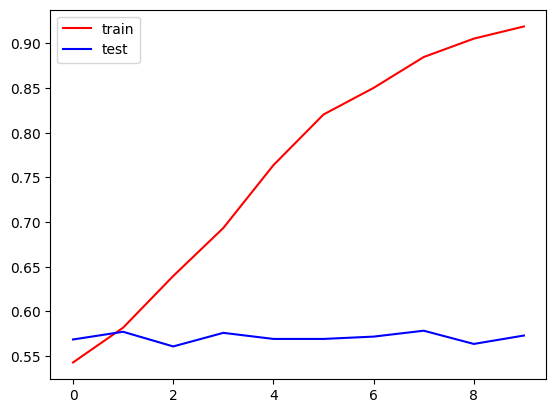

In [12]:
# Before applying batch normalization and the dropout layers
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test')
plt.legend()
plt.show()

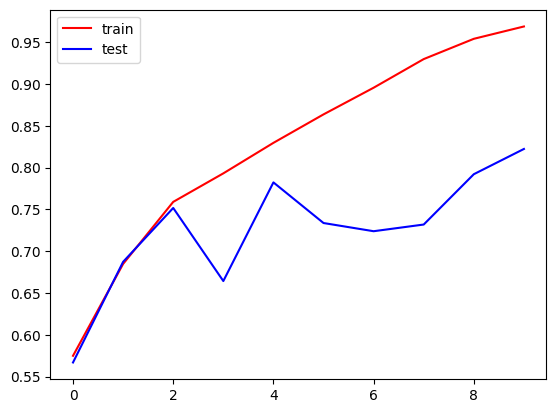

In [20]:
# After applying batch normalization and the dropout layers

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'test')
plt.legend()
plt.show()

In [ ]:
# Ways to reduce overfitting
# 1 . Add more data  --> we can't do so because we used all our data
# 2 . Data augmentation --> need to try
# 3 . L1/L2 Regularization --> need to try
# 4 . DropOut --> used here
# 5 . Batch Norm --> used here
# 6 . Reduce Complexity --> need to try


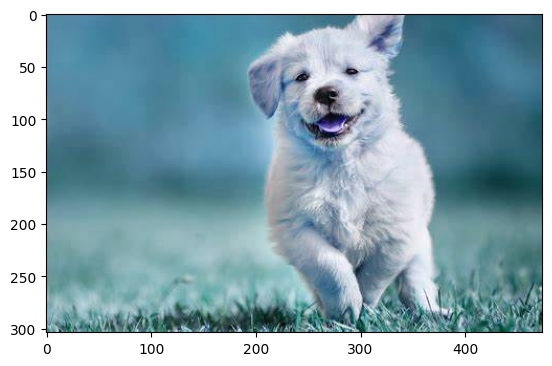

In [23]:
import cv2

test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [24]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [25]:
model.predict(test_input)

1/1 [==============================] - 1s 673ms/step


array([[0.9343216]], dtype=float32)

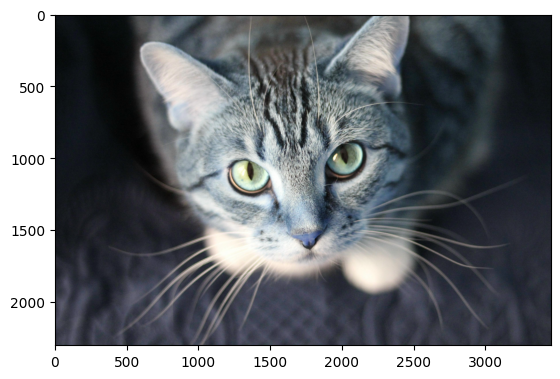

In [26]:
test_img = cv2.imread('/content/animal-cat-adorable-20787.jpg')
plt.imshow(test_img)

In [27]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.0565039e-09]], dtype=float32)

In [30]:
import os
os.mkdir('/content/drive/MyDrive/cat_dog_classification')

In [ ]:
import shutil
shutil.copy('/content/drive/MyDrive/Colab Notebooks/Dog v s Cat.ipynb',)